# Hackathon Tutoring Session: Analyzing Greek Fires Data

## Objective
This notebook serves as a tutorial for analyzing a dataset related to fires in Greece. By the end of this tutorial, you'll learn how to load a dataset, perform basic exploratory data analysis (EDA), and draw some meaningful insights from the data.

## Dataset
The dataset used in this tutorial contains information about fires in Greece, including various attributes such as location, date, and more.

## What You'll Learn
- How to load and inspect a dataset
- Basic data cleaning techniques
- Exploratory Data Analysis (EDA)
- Data visualization
- Basic statistical analysis

Let's get started!

## Step 1: Load the Dataset

We start by loading the dataset using the `pandas` library. This will give us a quick look at the structure of the data.

Run the cell below to load the dataset and view the first few rows.

In [1]:
import pandas as pd

# Load the dataset
dataset_path = 'GreekFires.json'  # Make sure to specify the correct path
df = pd.read_json(dataset_path)

# Show the first few rows of the dataset
df.head()

,is_retweet,timestamp,postid,is_quote,lang,match,concepts,sentiment,sentiment_score,location
0,false,2019-08-31 23:16:33+00:00,1167939258927087616,false,en,"{'keywords': ['wildfire'], 'places': ['evia', ...",[],neg,"{'negative': 0.7902, 'neutral': 0.2019, 'posit...","[{'placename': 'Greece', 'long': 21.9877132, '..."
1,false,2019-08-31 15:00:39+00:00,1167814461542952960,false,en,"{'keywords': ['wildfire', 'winds', 'high'], 'p...","[Outdoor, Sun, Explosion_Fire, Sky, Waterscape...",neu,"{'negative': 0.37210000000000004, 'neutral': 0...","[{'placename': 'Greece', 'long': 21.9877132, '..."
2,false,2019-08-31 14:59:17+00:00,1167814119992385536,false,en,"{'keywords': ['wildfire'], 'places': ['greece']}","[Vehicle, Explosion_Fire, Outdoor, Clouds, Sky...",neu,"{'negative': 0.1441, 'neutral': 0.824000000000...","[{'placename': 'Greece', 'long': 21.9877132, '..."
3,false,2019-08-30 18:10:08+00:00,1167499761836056576,false,en,"{'keywords': ['risk', 'high', 'fire'], 'places...",[],neg,"{'negative': 0.5316000000000001, 'neutral': 0....","[{'placename': 'Greece', 'long': 21.9877132, '..."
4,false,2019-08-30 17:00:33+00:00,1167482250553741312,false,en,"{'keywords': ['risk', 'high', 'fire'], 'places...",[],neg,"{'negative': 0.5476, 'neutral': 0.4384, 'posit...",[]


## Step 2: Basic Data Cleaning

Before diving into analysis, it's crucial to clean the dataset to make it easier to work with. This step often involves:

1. Handling missing values
2. Converting data types if necessary
3. Dropping irrelevant columns

Let's go ahead and clean our dataset.

In [2]:
# Identify missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)
# Drop irrelevant columns
columns_to_drop = ['is_retweet', 'is_quote', 'lang']
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
df_cleaned.head()

is_retweet          0
timestamp           0
postid              0
is_quote            0
lang                0
match               0
concepts            0
sentiment           0
sentiment_score    57
location            0
dtype: int64


,timestamp,postid,match,concepts,sentiment,sentiment_score,location
0,2019-08-31 23:16:33+00:00,1167939258927087616,"{'keywords': ['wildfire'], 'places': ['evia', ...",[],neg,"{'negative': 0.7902, 'neutral': 0.2019, 'posit...","[{'placename': 'Greece', 'long': 21.9877132, '..."
1,2019-08-31 15:00:39+00:00,1167814461542952960,"{'keywords': ['wildfire', 'winds', 'high'], 'p...","[Outdoor, Sun, Explosion_Fire, Sky, Waterscape...",neu,"{'negative': 0.37210000000000004, 'neutral': 0...","[{'placename': 'Greece', 'long': 21.9877132, '..."
2,2019-08-31 14:59:17+00:00,1167814119992385536,"{'keywords': ['wildfire'], 'places': ['greece']}","[Vehicle, Explosion_Fire, Outdoor, Clouds, Sky...",neu,"{'negative': 0.1441, 'neutral': 0.824000000000...","[{'placename': 'Greece', 'long': 21.9877132, '..."
3,2019-08-30 18:10:08+00:00,1167499761836056576,"{'keywords': ['risk', 'high', 'fire'], 'places...",[],neg,"{'negative': 0.5316000000000001, 'neutral': 0....","[{'placename': 'Greece', 'long': 21.9877132, '..."
4,2019-08-30 17:00:33+00:00,1167482250553741312,"{'keywords': ['risk', 'high', 'fire'], 'places...",[],neg,"{'negative': 0.5476, 'neutral': 0.4384, 'posit...",[]


### Handling Missing Values

After initial cleaning, it's a good practice to check for missing values in the dataset. Missing values can affect the quality of the analysis, so it's important to identify and handle them appropriately.

In our dataset, we noticed that the `sentiment_score` column has some missing values. We have a couple of options to handle this:
1. Drop the rows with missing values.
2. Fill the missing values with a predefined value, such as a neutral sentiment score.

In this tutorial, we will opt for the second approach and fill the missing `sentiment_score` with a neutral sentiment score of `{'negative': 0, 'neutral': 1, 'positive': 0}`.

Run the next cell to handle missing values.

In [3]:
# Create a default neutral sentiment score
default_sentiment_score = {'negative': 0, 'neutral': 1, 'positive': 0}

# Loop through the DataFrame and fill missing values in 'sentiment_score'
for i, row in df_cleaned.iterrows():
    if pd.isnull(row['sentiment_score']):
        df_cleaned.at[i, 'sentiment_score'] = default_sentiment_score

# Confirm that there are no more missing values
df_cleaned.isnull().sum()

timestamp          0
postid             0
match              0
concepts           0
sentiment          0
sentiment_score    0
location           0
dtype: int64

## Step 3: Exploratory Data Analysis (EDA)

EDA is a critical step that helps us understand the underlying structure of the data. This involves looking at summary statistics, distributions, and visualizations. In this section, we'll explore:

1. Summary statistics for numerical columns
2. Distributions of categorical variables
3. Basic data visualizations

Let's start by looking at summary statistics. (this takes long!!!!)

In [4]:
# Summary statistics for numerical columns
numerical_summary = df_cleaned.describe()

# Summary statistics for object-type columns
categorical_summary = df_cleaned.describe(include=['object'])

numerical_summary, categorical_summary

(             postid
 count  2.660500e+04
 mean   1.375387e+18
 std    1.414576e+17
 min    1.143904e+18
 25%    1.282554e+18
 50%    1.422161e+18
 75%    1.533921e+18
 max    1.564535e+18,
                                                     match concepts sentiment  \
 count                                               26605    26605     26605   
 unique                                                574     4420         3   
 top     {'keywords': ['κίνδυνος', 'πυρκαγιάς'], 'place...       []       neu   
 freq                                                13951    17906     23659   
 
                                           sentiment_score location  
 count                                               26605    26605  
 unique                                              21601     3724  
 top     {'negative': 0.4164, 'neutral': 0.5207, 'posit...       []  
 freq                                                   77    13600  )

### Summary Statistics

We have looked at summary statistics for both numerical and categorical columns. Here are some key points:

- The `postid` column is numerical but may not provide much analytical value.
- The `sentiment` column has three unique categories, with 'neu' (neutral) being the most frequent.
- Columns like `match`, `concepts`, and `location` have a variety of unique values and will be interesting to explore further.

Next, let's look at the distribution of some of these categorical variables.


### Categorical Variable Distributions

Understanding the distribution of categorical variables can give us insights into the composition of the data. In this section, we'll focus on the distribution of the `sentiment` column, which indicates the sentiment of each post as positive, negative, or neutral.

We'll use a bar plot to visualize the distribution.

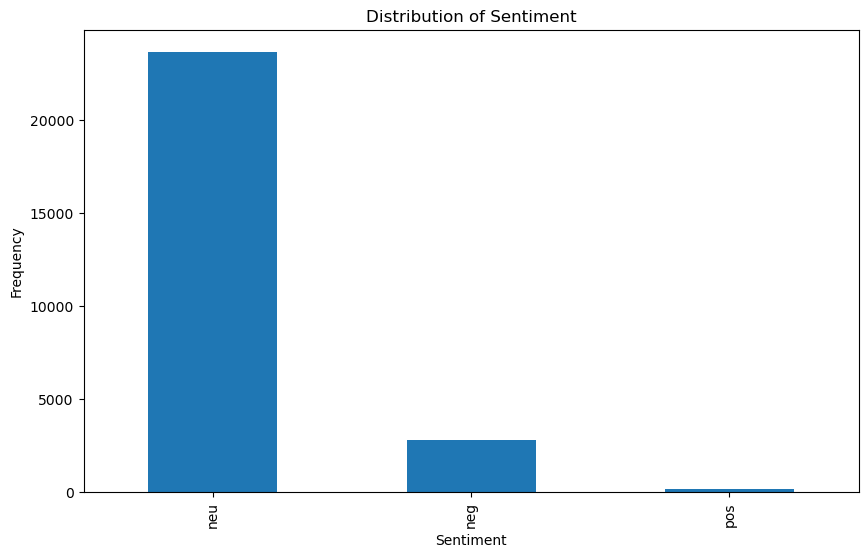

In [5]:
import matplotlib.pyplot as plt

# Count the frequency of each category in the 'sentiment' column
sentiment_counts = df_cleaned['sentiment'].value_counts()

# Create a bar plot for the 'sentiment' distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

#### Note on High Frequency of Neutral Sentiments

We observe an unusually high number of 'neutral' sentiments in the dataset. This could be due to various reasons such as data skew, limitations of the sentiment analysis tool, or the actual nature of the posts. Keep this in mind when interpreting the results of any subsequent analysis.

### Insights from the Sentiment Distribution

The bar plot gives us a good understanding of the sentiment distribution in the dataset. It appears that most of the posts have a 'neutral' sentiment, followed by 'negative' and 'positive'.

This could be an interesting starting point for further analysis, such as exploring what keywords or concepts are most commonly associated with each sentiment.

## Step 4: Generate Word Clouds for Keywords and Concepts

Word clouds provide a visual representation of text data. The importance of each word is shown with font size or color. In this section, we'll generate word clouds for:

1. Keywords inside the `match` column
2. Concepts

This will give us a sense of the most frequent terms in our dataset.


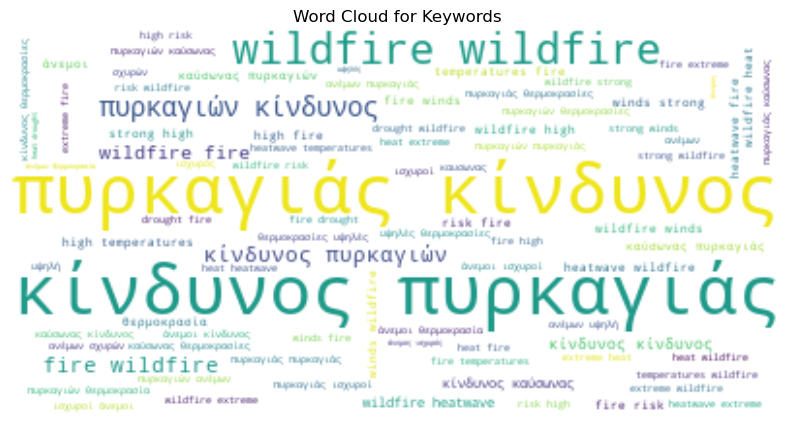

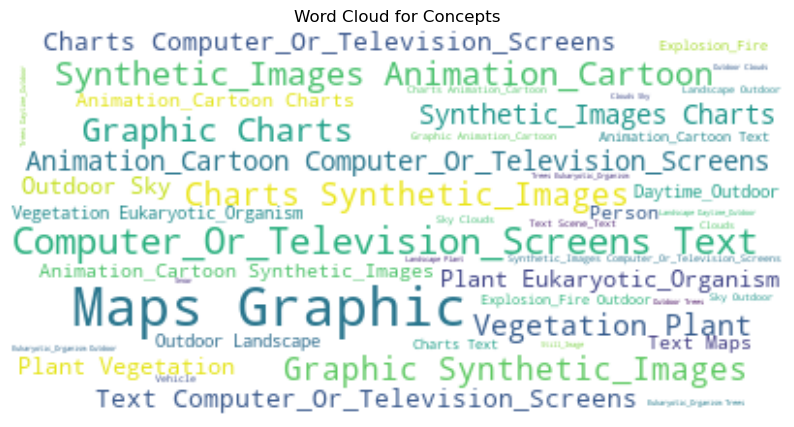

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract and prepare keywords and concepts
keywords_list = [item['keywords'] for item in df_cleaned['match'] if item['keywords'] is not None]
keywords_text = ' '.join([keyword for sublist in keywords_list for keyword in sublist])

concepts_list = [concept for sublist in df_cleaned['concepts'] for concept in sublist]
concepts_text = ' '.join(concepts_list)

# Generate word cloud for Keywords
plt.figure(figsize=(10, 6))
wordcloud_keywords = WordCloud(background_color='white').generate(keywords_text)
plt.imshow(wordcloud_keywords, interpolation='bilinear')
plt.title('Word Cloud for Keywords')
plt.axis("off")
plt.show()

# Generate word cloud for Concepts
plt.figure(figsize=(10, 6))
wordcloud_concepts = WordCloud(background_color='white').generate(concepts_text)
plt.imshow(wordcloud_concepts, interpolation='bilinear')
plt.title('Word Cloud for Concepts')
plt.axis("off")
plt.show()

## Step 5: Filter Data Based on Specific Concept and Re-Analyze

We observed that some posts are associated with the concept "Explosion_Fire". To gain more specific insights, we'll filter our dataset to include only those posts and then re-analyze the sentiment distribution and prominent keywords and concepts.

In [8]:
# Filter data to include only posts with the concept "Explosion_Fire"
filtered_df = df_cleaned[df_cleaned['concepts'].apply(lambda x: 'Explosion_Fire' in x)]

In [10]:
len(filtered_df)

1883

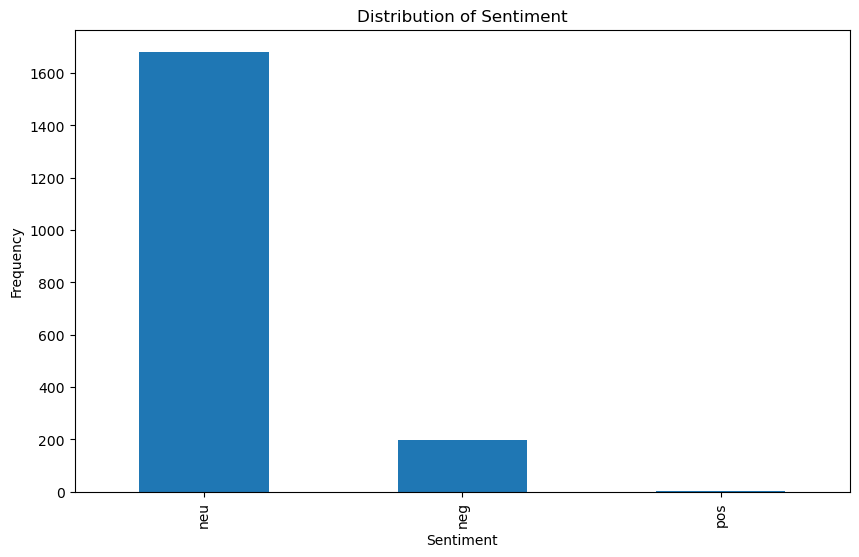

In [11]:
# Count the frequency of each category in the 'sentiment' column
sentiment_counts = filtered_df['sentiment'].value_counts()

# Create a bar plot for the 'sentiment' distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

### Sentiment Distribution in Filtered Data

The bar plot shows the distribution of sentiments in the posts that are associated with "Explosion_Fire."

- **Neutral**: 1682 posts
- **Negative**: 197 posts
- **Positive**: 4 posts

The majority of the posts are still neutral, but we observe a higher proportion of negative sentiments compared to the full dataset.

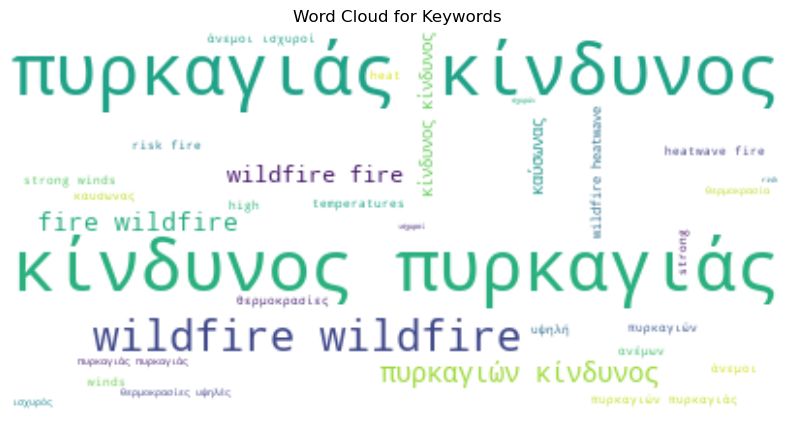

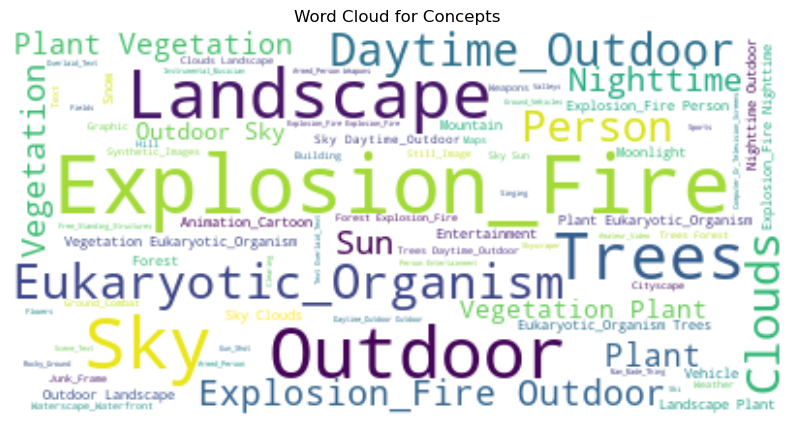

In [12]:
# Extract and prepare keywords and concepts
keywords_list = [item['keywords'] for item in filtered_df['match'] if item['keywords'] is not None]
keywords_text = ' '.join([keyword for sublist in keywords_list for keyword in sublist])

concepts_list = [concept for sublist in filtered_df['concepts'] for concept in sublist]
concepts_text = ' '.join(concepts_list)

# Generate word cloud for Keywords
plt.figure(figsize=(10, 6))
wordcloud_keywords = WordCloud(background_color='white').generate(keywords_text)
plt.imshow(wordcloud_keywords, interpolation='bilinear')
plt.title('Word Cloud for Keywords')
plt.axis("off")
plt.show()

# Generate word cloud for Concepts
plt.figure(figsize=(10, 6))
wordcloud_concepts = WordCloud(background_color='white').generate(concepts_text)
plt.imshow(wordcloud_concepts, interpolation='bilinear')
plt.title('Word Cloud for Concepts')
plt.axis("off")
plt.show()

### Word Clouds for Filtered Data

The word clouds provide a visual representation of the frequency of keywords and concepts in the posts that are associated with "Explosion_Fire."

- **Keywords**: The most prominent keywords include "κίνδυνος πυρκαγιάς", "wildfire" etc. 
- **Concepts**: The dominant concepts are "Explosion_Fire",  "Trees" etc. 

These could be indicative of the general themes or topics discussed in relation to "Explosion_Fire."

## Step 6: Spatiotemporal Analysis on Filtered Data

In this section, we will analyze the filtered dataset based on:

1. Locations: To see where the posts associated with "Explosion_Fire" are primarily originating from.
2. Timestamps: To identify any temporal patterns or trends in the posts.


### Location Analysis on Filtered Data
For this part, we'll plot the geographic coordinates to visualize where the posts related to "Explosion_Fire" are primarily originating from. We can use a scatter plot on a map for this purpose.

In [17]:
filtered_df['location']

1        [{'placename': 'Greece', 'long': 21.9877132, '...
2        [{'placename': 'Greece', 'long': 21.9877132, '...
16       [{'placename': 'Euboea, Thessaly and Central G...
37       [{'placename': 'Uttarakhand, India', 'long': 7...
54       [{'placename': 'Μακρυμάλλη, Dirfyon - Messapio...
                               ...                        
26474                                                   []
26541                                                   []
26595    [{'placename': 'Attari, ODR34, Attari, Amritsa...
26602                                                   []
26603                                                   []
Name: location, Length: 1883, dtype: object

It appears that the location field contains lists of dictionaries, where each dictionary represents a place with its associated latitude and longitude.

To proceed with geographic plotting, we'll need to extract valid latitude and longitude values from these dictionaries. Let's clean and prepare the location data for plotting:

In [ ]:
import geopandas as gpd

In [18]:
# Filter out rows with empty or invalid 'location' values
filtered_df['location'] = filtered_df['location'].apply(lambda x: [entry for entry in x if 'lat' in entry and 'long' in entry])

# Extract valid latitude and longitude values
filtered_df['latitude'] = filtered_df['location'].apply(lambda x: x[0]['lat'] if x else None)
filtered_df['longitude'] = filtered_df['location'].apply(lambda x: x[0]['long'] if x else None)

# Create a new GeoDataFrame with valid coordinates
gdf = gpd.GeoDataFrame(
    filtered_df, geometry=gpd.points_from_xy(filtered_df.longitude, filtered_df.latitude))

# Set the coordinate reference system (CRS)
gdf.crs = {'init': 'epsg:4326'}

# Plot the geographic distribution of posts
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color='k')
gdf.plot(ax=ax, markersize=5, color='red')
plt.title('Geographic Distribution of Posts Related to "Explosion_Fire"')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\CERTH-ITI\AppData\Local\Temp\ipykernel_9360\1242934633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['location'] = filtered_df['location'].apply(lambda x: [entry for entry in x if 'lat' in entry and 'long' in entry])
C:\Users\CERTH-ITI\AppData\Local\Temp\ipykernel_9360\1242934633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['latitude'] = filtered_df['location'].apply(lambda x: x[0]['lat'] if x else None)
C:\Users\CERTH-ITI\AppData\Local\Temp\ipykernel_9360\12429

NameError: name 'gpd' is not defined